# Image Analysis - Unit 03 - Real Datasets - Part 02

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Understand the differences for image datasets folder structure, and split folders into train, validation and test sets



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from zipfile import ZipFile

# Lets extract the data we will be using
with ZipFile('Chess.zip', 'r') as chessZip:
   chessZip.extractall()
with ZipFile('Covid19-dataset.zip', 'r') as covidZip:
   covidZip.extractall()

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Analysis - Real Datasets - Part 02

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In the last unit we used the Chess dataset, where a single folder hosted a set of sub-folders. Eeach sub-folder is related to a label. In each subfolder, you found a set of images

* For ML task of image classification, we are interested to have a standarized way to arrange the files in a folder, so before doing any Image Analysis and ML on images, we have to arrange the dataset folders.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> As a recap, our images could be arranged in these 3 formats
  * 1 folder (with subfolders as the labels)
  * 2 folders (like Train and Test)
  * or 3 folders (with Train, Validation and Test)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Ultimately we want to have **3 folders: Train, Validation and Test**.


The image below shows 3 potential folder structures. The first on the left shows 1 folder (with subfolders as the labels), the central piece shows 2 folders (like Train and Test set folders) and the last on the right shows 3 folders (with Train, Validation and Test)

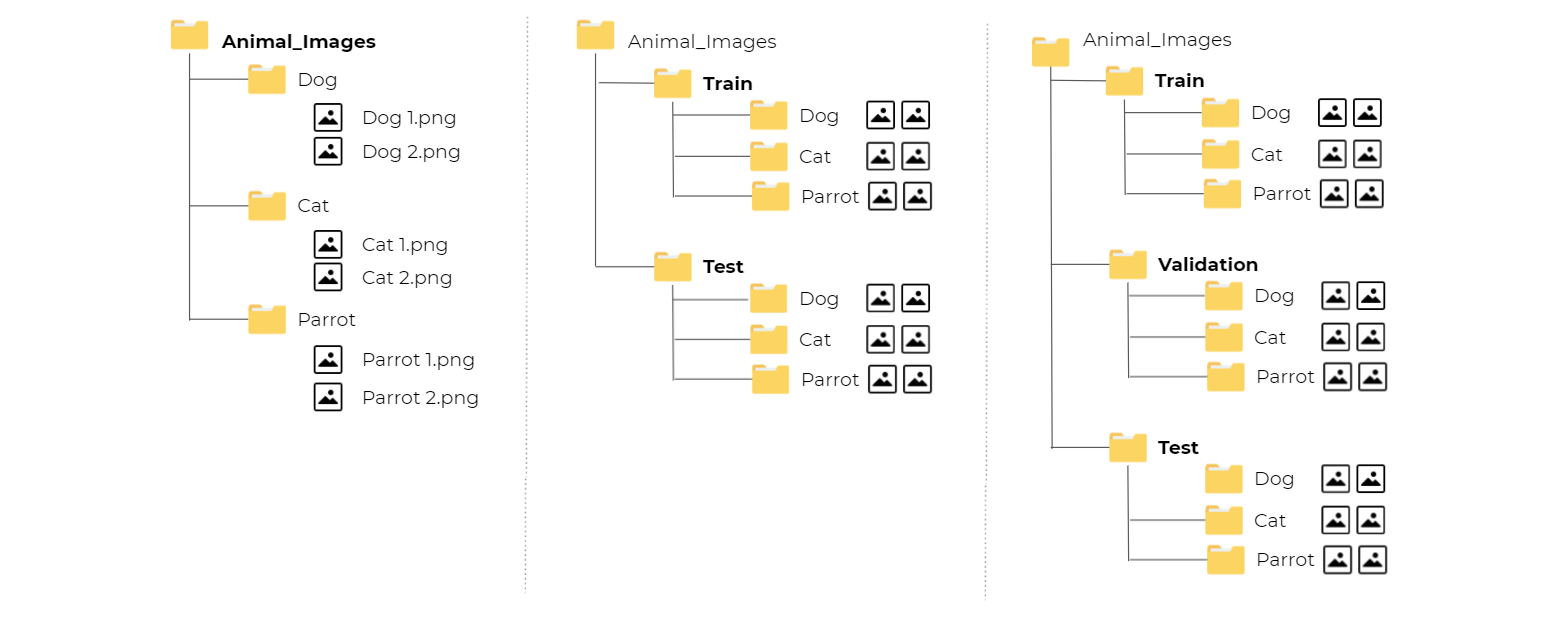

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Again, we are interested to have a 3-folder structure. We will need to programatically move files between folders. 
* The reason to have 3 folders is that for the process of fitting a model, we need 3 data sets: train, validation and test sets; as we have previously studied

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's split in 2 possibilities:
* The dataset comes with 1 folder
* The dataset comes with 2 folders (either Train/Test or Train/Validation). We will stick to Train/Test convention

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We are going to use a workflow:
* 1 - Delete non image files
* 2 - Split Train, Validation, Test Set


---

### The dataset comes with 1 folder

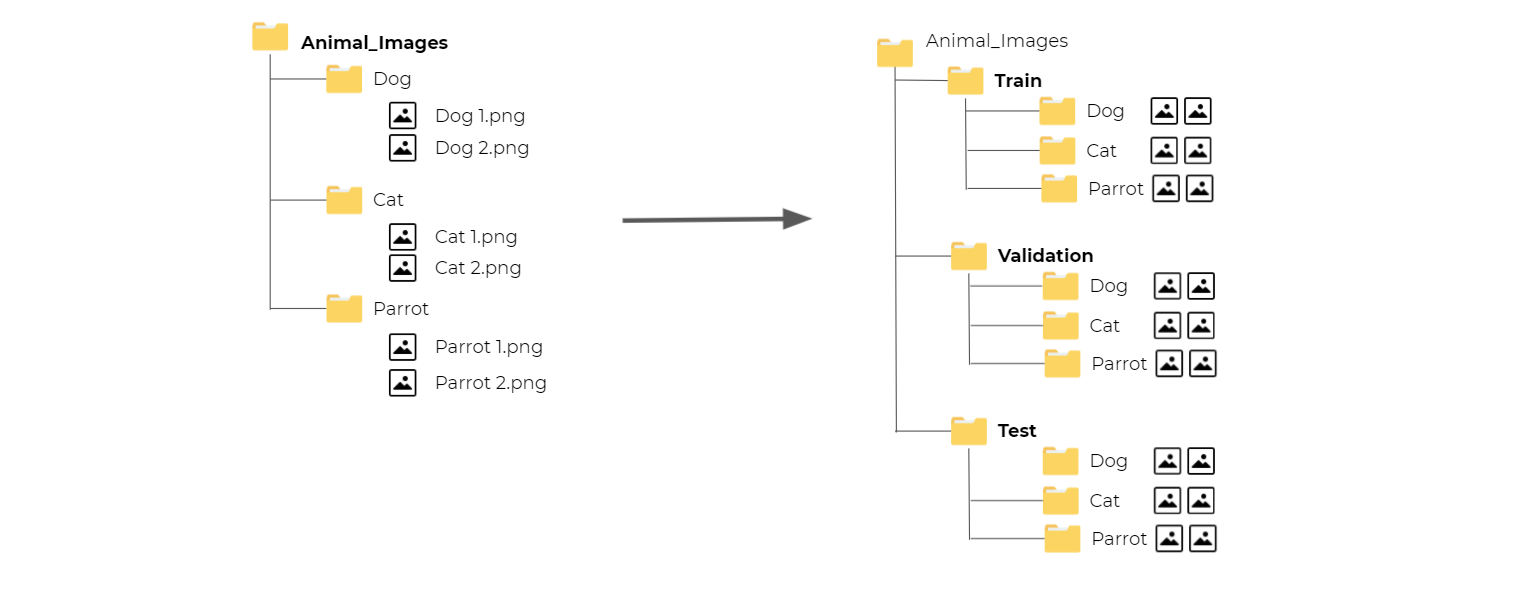

We will use the same [Chess dataset](https://www.kaggle.com/niteshfre/chessman-image-dataset) to demonstrate how to arrange it into **3 folders: Train, Validation and Test**


---


#### Split Train, Validation, Test Set

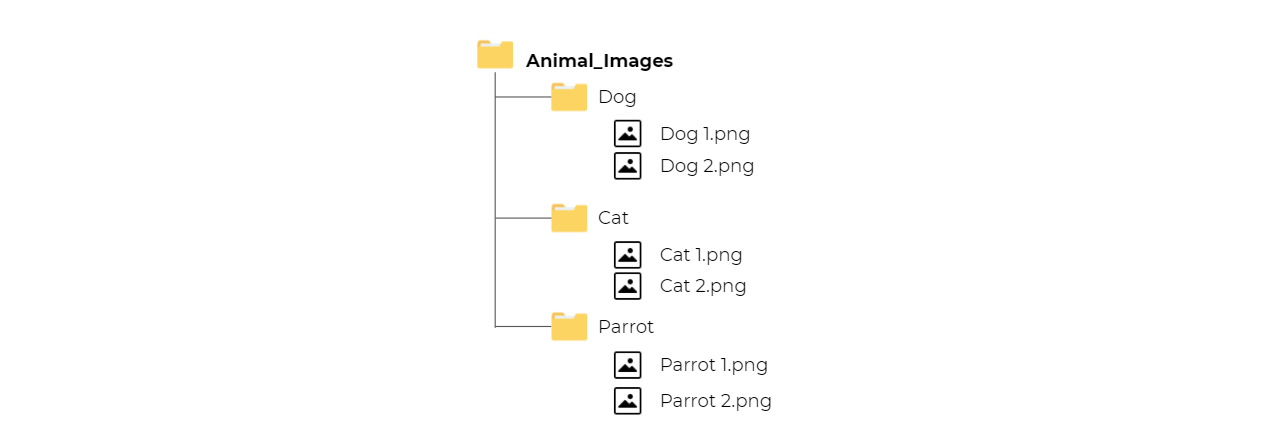

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We assume there is one folder that holds a set of folders that represent the label. In each sub-folder, we find the images related to each label.
* Read the pseudo code function to understand function objective
  * It is normal and okay if you don't get all code from the function below at first. The major point is to make sense the pseudo code and understand the function parameters.

import os
import shutil
import random
import joblib


def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    """
    logic
    - There is one folder that holds a set of folders that represent the label. 
    In each sub-folder, we find the images related to each label
    - you provide the ratio for train, validation and test set. they should sum 1.0
    - it will generate 3 folders (train, validation and test). In each folder, 
    there will be a set of subfolder, related to each label. The proportion of a given 
    label across folders (train, validation, set), is set with train_set_ratio, validation_set_ratio, 
    and test_set_ratio parameters
    """

    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
        return

    # gets labels
    labels = os.listdir(my_data_dir)  # it should get only the folder name
    if 'test' in labels:
        pass
    else:
        # hack: sometimes in jupyter notebook session, a temporary/invisible
        # folder called .ipynb_checkpoints appears, we don't want it, so we remove it from labels list
        labels = [item for item in labels if '.ipynb_checkpoints' not in item]

        # create train, validation, test folders with labels sub-folder
        for folder in ['train', 'validation', 'test']:
            for label in labels:
                os.makedirs(name=my_data_dir + '/' + folder + '/' + label)

        for label in labels:

            files = os.listdir(my_data_dir + '/' + label)
            random.shuffle(files)

            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)

            count = 1
            for file_name in files:
                if count <= train_set_files_qty:
                    # move given file to train set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/train/' + label + '/' + file_name)

                elif count <= (train_set_files_qty + validation_set_files_qty):
                    # move given file to validation set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/validation/' + label + '/' + file_name)

                else:
                    # move given file to test set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/test/' + label + '/' + file_name)

                count += 1
            os.rmdir(my_data_dir + '/' + label)


Let's display the folders within the Chess folder.

!ls Chess

Within the Chess folder we see there are three further folders, these are related to the dataset labels, let's display the content of the folder named Bishop

* We now see the images inside the Bishop folder, notice we have jpg, gif, and png file extensions

!ls Chess/Bishop

We will split allocating 65% to the train set, 15% to validation, and 20% to the test set

split_train_validation_test_images(my_data_dir='Chess',
                                   train_set_ratio=0.65,
                                   validation_set_ratio=0.15,
                                   test_set_ratio=0.2)

You can see how the folder structure changed, and now within the Chess folder we have the folders test, train, validation

!ls Chess

If you look inside the train folder you will see folders for Bishop, King, and Knight

!ls Chess/train

![image.png](attachment:image.png)

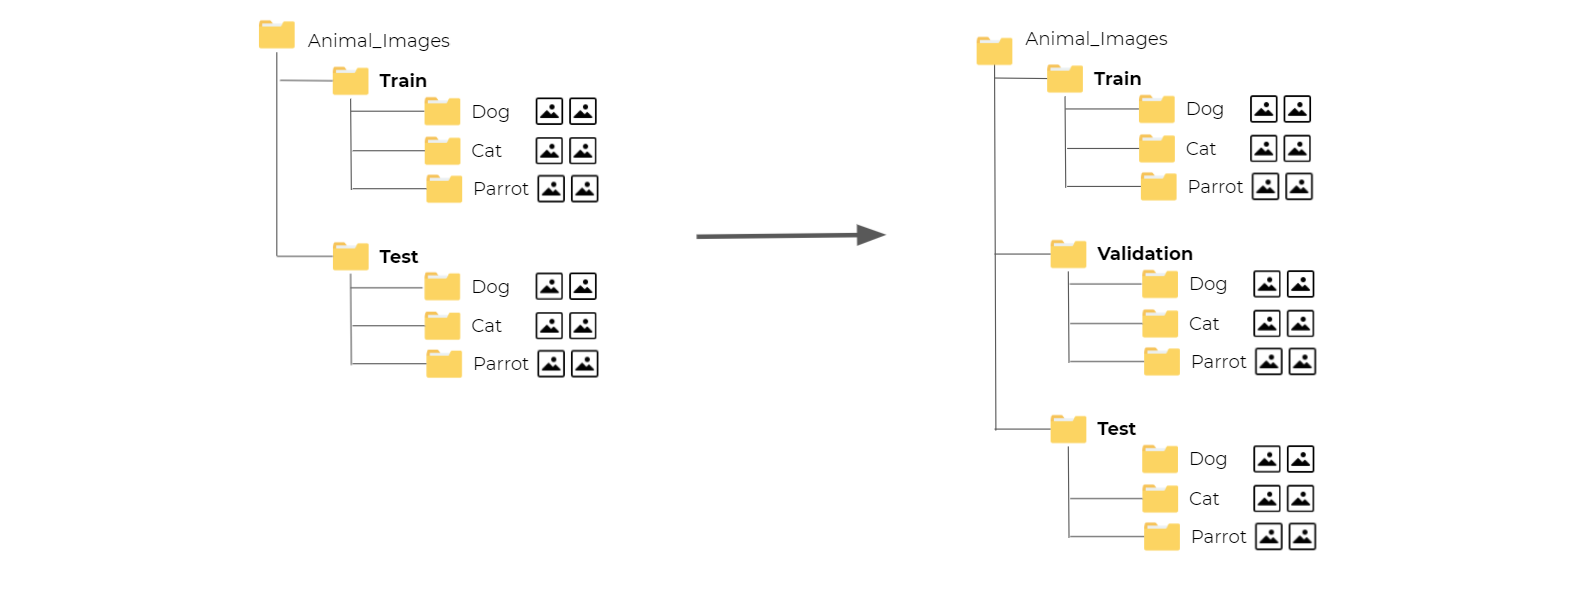

We will use [covid19 image datasets](https://www.kaggle.com/pranavraikokte/covid19-image-dataset), which is made using a set of Chest X-rays arranged in Train and Test Set
* We will demonstrate how to arrange into 3 folders: Train, Validation and Test

---

#### Split Train, Validation, Test Set

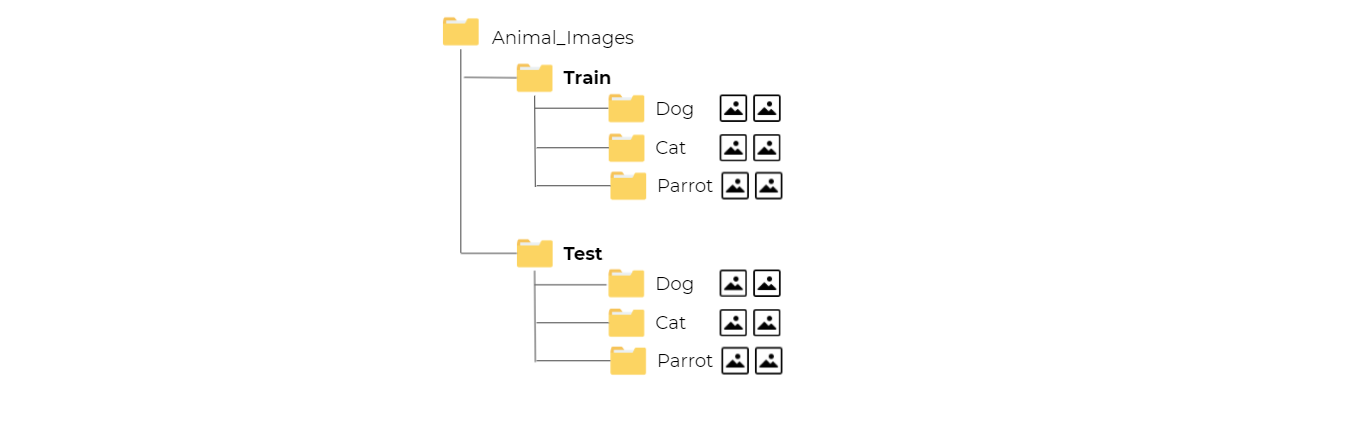

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The folders are split into Train and Test set already. 
* We want to get part of data from train and assign to a validation folder
  * It is normal and okay if you don't get all code from the function below at first. The major point is to make sense the pseudo code and understand the function parameters.

!ls Covid19-dataset

import os
import shutil
import random
import joblib


def split_validation_from_train_set(my_data_dir, train_set_folder_name, train_set_ratio):

    if train_set_ratio >= 1.0 or train_set_ratio < 0:
        print("train_set_ratio should be positive and smaller than 1.0")
        return

    # define train set dir
    train_set_dir = my_data_dir + '/' + train_set_folder_name
    directory_list = os.listdir(my_data_dir)

    # gets labels
    labels = os.listdir(train_set_dir)
    
    if 'validation' in directory_list:
        pass
    else:

        # hack: sometimes in jupyter notebook session, a temporary/invisible
        # folder called .ipynb_checkpoints appears, we don't want it, so we remove it from labels list
        labels = [item for item in labels if '.ipynb_checkpoints' not in item]

        for label in labels:  # create validation folder
            os.makedirs(name=my_data_dir + '/validation/' + label)

        for label in labels:
            files = os.listdir(train_set_dir + '/' + label)
            random.shuffle(files)
            train_set_files_qty = int(len(files) * (1-train_set_ratio))

            count = 1
            for file_name in files:
                if count <= train_set_files_qty:
                    # move given file to validation set
                    shutil.move(train_set_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/validation/' + label + '/' + file_name)

                count += 1


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We provide the data directory, the train_set_folder_name and a train_set_ratio of 0.7, that means 70% of data from the train set will remain in the train set, and the difference, 30% of the train set, will go to the validation set

split_validation_from_train_set(my_data_dir= 'Covid19-dataset',
                                train_set_folder_name = 'train',
                                train_set_ratio=0.8)

If you check the folder structure of the Covid19-dataset, you will see it now contains folders for test, train, and validation

!ls Covid19-dataset